# ⛈ K-Index

The K-Index is one indicator of [thunderstorm potential](https://github.com/Unidata/MetPy/issues/631)
    
$$ K = (T_{850} - T_{500}) + Td_{850} - (T_{700} - Td_{700})$$

Where $T$ is temperature and $Td$ is dew point temperature at the level in hPa.

- K values +20 indicate some potential for air mass thunderstorms.
- K values +40 indicate almost 100% chance for air mass thunderstorms,
- with values over +30 to indicate potential MCC's.

Cool temperatures aloft and warm temperatures below are associated with instability at the surface (resulting in rising motion). Dry air aloft will lower the K value because when dry air entrains in a cumulus cloud it restricts it's thunderstorm growth.

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
ds = Herbie("2021-04-28 23:00").xarray("(TMP|DPT):(500|700|850) mb")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Apr-28 23:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:722: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(search)
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


In [3]:
ds

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 3, y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-04-28T23:00:00
    step                 timedelta64[ns] 00:00:00
  * isobaricInhPa        (isobaricInhPa) float64 850.0 700.0 500.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2021-04-28T23:00:00
Dimensions without coordinates: y, x
Data variables:
    t                    (isobaricInhPa, y, x) float32 281.0 281.0 ... 248.5
    dpt                  (isobaricInhPa, y, x) float32 276.0 275.9 ... 236.7
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20210428\subset_2eef...
    search:            (TMP|DPT):(500|700|850) mb

In [4]:
T850 = ds.t.sel(isobaricInhPa=850)
T500 = ds.t.sel(isobaricInhPa=500)

D850 = ds.dpt.sel(isobaricInhPa=850)

T700 = ds.t.sel(isobaricInhPa=700)
D700 = ds.dpt.sel(isobaricInhPa=700)

In [5]:
K = (T850 - T500) + D850 - (T700 - D700) - 273.15

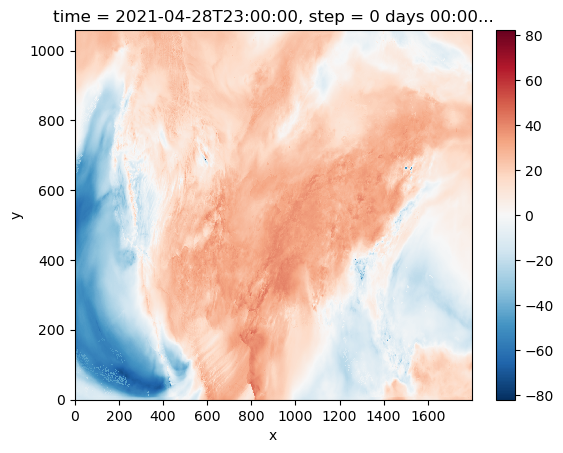

In [6]:
K.plot()

In [7]:
# Make a custom colormap

cmap = mcolors.LinearSegmentedColormap.from_list("k-index", ["w", "orange", "r"], 3)
cmap.set_over("k")
cmap.set_under("#3333ff10")
norm = mcolors.BoundaryNorm([0, 20, 30, 40], 3)

Text(0.5, 1.0, 'HRRR')

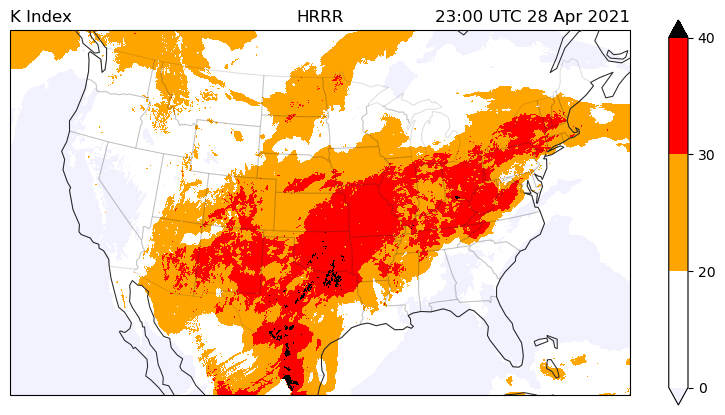

In [8]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 5]).STATES().ax
K.plot(x="longitude", y="latitude", ax=ax, cmap=cmap, norm=norm, transform=pc)

str_date = K.valid_time.dt.strftime("%H:%M UTC %d %b %Y").item()
plt.title("K Index", loc="left")
plt.title(str_date, loc="right")
plt.title("HRRR", loc="center")